<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MathematicalModels/Queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import *
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import widgets
from google.colab import output
from IPython.display import Image, display

In [ ]:
def general(M, sigma, n):
    y,x = symbols("y x")
    k = 1/(3*sqrt(2*math.pi)*sigma**2)
    f_1 = k*(x+3*sigma)**2/2*1/(k*9*sigma**2)
    f_2 = 1 - k*(x-3*sigma)**2/2*1/(k*9*sigma**2)
    f_y_1 = solve(Eq(f_1,y),x)
    f_y_2 = solve(Eq(f_2,y),x)
    mas_x=[]
    mas_y=[]
    for i in range(-100,100):
      X = 3*sigma/100*i
      if(i<0):
        mas_x.append(X+M)
        mas_y.append(f_1.subs(x,X))
      else:
        mas_x.append(X+M)
        mas_y.append(f_2.subs(x,X))
    #plt.plot(mas_x,mas_y)
    #plt.title('График распределиния вероятностей')
    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.show()

    xx = []

    for i in range(n):
      vr_y = random.uniform(0,1)
      if(vr_y<0.5):
        xx.append(float(f_y_1[1].subs(y,vr_y)))
      else:
        xx.append(float(f_y_2[0].subs(y,vr_y)))
    for i in range(len(xx)):
      xx[i]+=M

    plt.xlabel('Число')
    plt.ylabel('Количество')
    plt.title('Треугольное распределение')
    n, b, p = plt.hist(xx, bins=50)
    plt.show()
    return xx

In [ ]:
#процессно-ориентированный способ (по №клиента)
def queue1(m, n):
  m1 = [m[0], [0]*n, [0]*n, [0]*n, m[4]] # интервал прихода, время прихода, время начала обслуживания, время окончания обслуживания, интервал обслуживания
  m1[1][0]=m1[2][0]=0
  m1[3][0]=m1[2][0]+m1[4][0]
  queue = m0
  queue[0]=0
  for i in range(1, n):
      m1[1][i]=m1[1][i-1]+m1[0][i-1]

      if (m1[1][i]>m1[3][i-1]):
          m1[2][i]=m1[1][i]
      else:
          m1[2][i]=m1[3][i-1]
      m1[3][i]=m1[2][i]+m1[4][i]

      queue[i]=0
      for j in range(i):
        if m1[2][j]>=m1[1][i]:
          queue[i]+=1
  return queue, m1

#пошаговый способ (delta_t)
def queue2(m, n):
  m2 = [m[0], [0]*n, [0]*n, m[4]] # интервал прихода, кто пришел, кто обслуживается, интервал обслуживания
  m2[1][0]=m2[2][0]=0
  delta = 1
  a, b, a_n, b_n = 0, m2[1][0], 0, 0
  queue = [0]*n
  queue[0]=0
  for i in range(1, n):
      while (delta*i>=a):
        a += m2[0][a_n]
        a_n +=1
      m2[1][i]=a_n-1
      while (delta*i>=b):
        b += m2[3][b_n]
        b_n +=1
      m2[2][i]=b_n-1
      queue[i]=abs(a_n -b_n)
  return queue, m2

#событийный способ (по номеру события(времени события))
def queue3(m, n):
  m3 = [m[0], [0]*n, [0]*n, m[4]] # интервал прихода, врeмя, занято ли устройство, интервал обслуживания
  queue = [0]*n
  queue[0]=0
  i_arrival, i_service = 0, 0
  t_event = 0 # время события
  t_arr, t_serv = 0, 0
  case = 0
  device = True # устройство обслуживания свободно (если False, то можно занимать)
  device = False
  m3[2][0] = device
  for i in range(1, n):
      if t_arr+m3[0][i_arrival]<= t_serv+m3[3][i_service]:
        t_event = t_arr+m3[0][i_arrival]
        t_arr+=m3[0][i_arrival]
        i_arrival+=1
        case = 0 # кто-то пришел
      else:
        t_event = t_serv+m3[3][i_service]
        t_serv+=m3[0][i_service]
        i_service+=1
        case = 1 # кто-то обслужился
      m3[1][i]=t_event
      m3[2][i]=device
      if case == 0:
        if not device :
          queue[i]=queue[i-1]+1
        else:
          if queue[i-1]==0:
            queue[i]=queue[i-1]
            device = False
          else:
            queue[i]=queue[i-1]+1-1
            device = True
      if case == 1:
          device = True
          if queue[i-1]>0:
            queue[i]=queue[i-1]-1
            device = False
  return queue, m

In [ ]:
#@title Транзакты ждут в очереди
from IPython.display import Image
Image(url='https://i.pinimg.com/originals/fe/5f/86/fe5f8617680280c885f91113ccbe6107.gif')

In [ ]:
M1 = 10 #@param {type:"number"}                                        #матожидание прихода
# длительность смены в минутах
M2 = 10 #@param {type:"number"}                                        #матожидание обслуживания
# на какой минуте показать
sigma1 = 3 #@param {type:"number"}
# длительность а операции 1 работника                                  #среднеквадратичное отклонение прихода
sigma2 = 2 #@param {type:"number"}
# длительность а операции 1 работника                                  #среднееквадартичное отклонение обслуживания

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

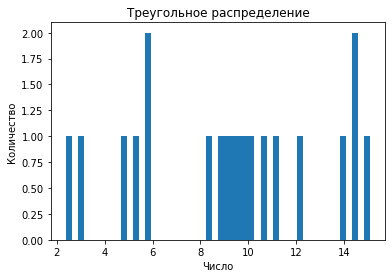

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

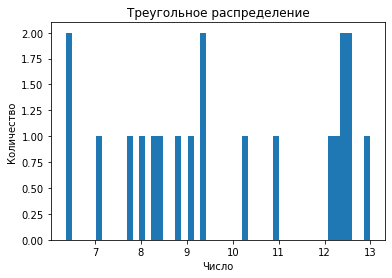

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

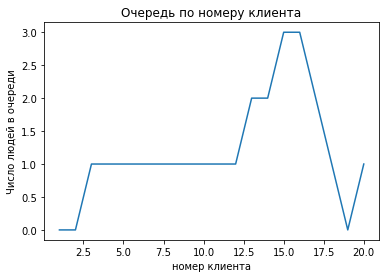

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

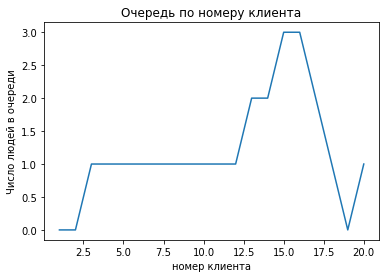

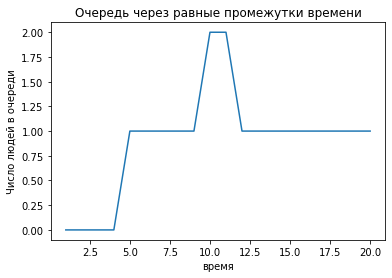

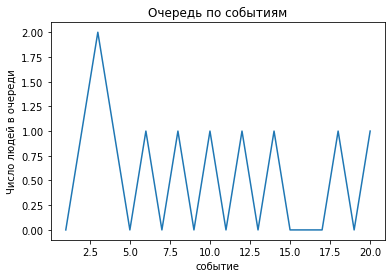

<IPython.core.display.Javascript object>

In [ ]:
#@title .
t = widgets.TabBar(["приход транзактов", "обслуживание транзактов", "очередь по номеру клиента", "все"])

m0 = []
n =20
for i in range(n):
    m0.append (0)
m = []


with t.output_to(0):
  m.append(general(M1, sigma1, n))

for i in range (1, 4):
    m.append (m0)

with t.output_to(1):
  m.append(general(M2, sigma2, n))

x = []
for i in range (n):
    x.append (i+1)
q1 = queue1(m, n)[0]
q2 = queue2(m, n)[0]
q3 = queue3(m, n)[0]

with t.output_to(2):
  plt.plot(x,q1)
  plt.title('Очередь по номеру клиента')
  plt.xlabel('номер клиента')
  plt.ylabel('Число людей в очереди')
  plt.show()

#data = { 'people':people, 'tprih':tprih,'tobsl_start':tobsl_start, 'tobsl_end':tobsl_end, 'intobsl':intobsl, 'queu':queu}
#df = pd.DataFrame(data, index = time)
with t.output_to(3):
  plt.plot(x,q1)
  plt.title('Очередь по номеру клиента')
  plt.xlabel('номер клиента')
  plt.ylabel('Число людей в очереди')
  plt.show()

  plt.plot(x,q2)
  plt.title('Очередь через равные промежутки времени')
  plt.xlabel('время')
  plt.ylabel('Число людей в очереди')
  plt.show()

  plt.plot(x,q3)
  plt.title('Очередь по событиям')
  plt.xlabel('событие')
  plt.ylabel('Число людей в очереди')
  plt.show()